 (\#号后面的东西不一定有用但是先不要删.)

# STA141B FINAL GROUP PROJECT

In [1]:
# import urllib.request, urllib.parse, urllib.error
# import lxml
# from collections import Counter
# import xml.etree.ElementTree as ET
# import ssl
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json,sys
import re
from matplotlib import pyplot as plt
import plotnine as p9
from plotnine import *
import sqlalchemy as sqla
import numpy as np

In [4]:
# web API,  parse HTML
url = 'https://datahub.io/core/covid-19#data-cli'
html_text = requests.get(url).text
soup = BeautifulSoup(html_text, 'html.parser')

In [5]:
html = []
df = {}
count = 1
for link in soup.find_all('a'):
    str_link = str(link.get('href'))
    
    if str_link.startswith('/core/covid-19/r/') and re.search('json$',str_link):
        html.append('https://datahub.io' + str_link)
        js = requests.get('https://datahub.io' + str_link).json() 
        df[count] =  pd.DataFrame(js)
        count += 1


In [4]:
html # so we have total 8 dataframe with using under data

['https://datahub.io/core/covid-19/r/countries-aggregated.json',
 'https://datahub.io/core/covid-19/r/key-countries-pivoted.json',
 'https://datahub.io/core/covid-19/r/reference.json',
 'https://datahub.io/core/covid-19/r/time-series-19-covid-combined.json',
 'https://datahub.io/core/covid-19/r/us_confirmed.json',
 'https://datahub.io/core/covid-19/r/us_deaths.json',
 'https://datahub.io/core/covid-19/r/us_simplified.json',
 'https://datahub.io/core/covid-19/r/worldwide-aggregate.json']

In [5]:
df[1] # example: the 1st table

,Confirmed,Country,Date,Deaths,Recovered
0,0,Afghanistan,2020-01-22,0,0
1,0,Afghanistan,2020-01-23,0,0
2,0,Afghanistan,2020-01-24,0,0
3,0,Afghanistan,2020-01-25,0,0
4,0,Afghanistan,2020-01-26,0,0
...,...,...,...,...,...
131707,133593,Zimbabwe,2021-11-19,4699,0
131708,133615,Zimbabwe,2021-11-20,4699,0
131709,133647,Zimbabwe,2021-11-21,4699,0
131710,133674,Zimbabwe,2021-11-22,4699,0


### 先随便搞点分析找灵感
### 先分析worldwide，再US
### Plots
#### Part I. Look at the time trend for confirmed cases in key countries

#### Part I. Look at the worldwide death increasing trend vs. confirmation increasing trend

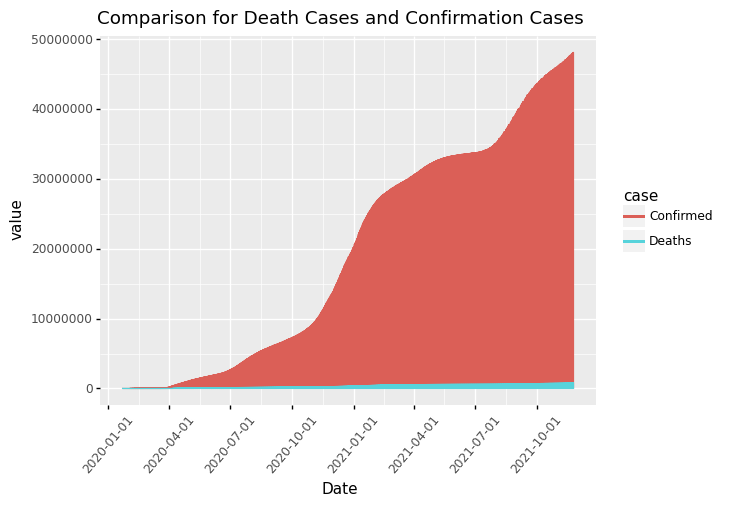

<ggplot: (8775836250823)>

In [6]:
countries_agg = df[1]
countries_agg['Date'] = pd.to_datetime(countries_agg['Date'].astype(str))
countries_agg['Deaths'] = pd.to_numeric(countries_agg['Deaths'],errors='coerce')
countries_agg['Confirmed'] = pd.to_numeric(countries_agg['Confirmed'],errors='coerce')
melt_countries_agg = pd.melt(countries_agg, id_vars=['Date'], 
               value_vars=['Confirmed','Deaths'])
melt_countries_agg = melt_countries_agg.rename(columns={'variable':'case'})
(p9.ggplot(melt_countries_agg) 
+ p9.aes(x='Date',y='value',colour = 'case') 
+ p9.geom_line() 
+ p9.labs(title = 'Comparison for Death Cases and Confirmation Cases')
+ p9.theme(axis_text_x = p9.element_text(angle=50))
)

#### Part II. Look at the time trend for death cases in key countries

In [25]:
melt_key_country = pd.melt(df[2], id_vars=['Date'], 
               value_vars=['China','US','United_Kingdom','Italy','France','Germany','Spain','Iran'])
melt_key_country = melt_key_country.rename(columns={'variable':'country','value':'death'})
melt_key_country['death'] = pd.to_numeric(melt_key_country['death'],errors='coerce')
melt_key_country['Date'] = melt_key_country['Date'].astype(str)
melt_key_country['Date'] = pd.to_datetime(melt_key_country['Date'])
melt_key_country

,Date,country,death
0,2020-01-22,China,548
1,2020-01-23,China,643
2,2020-01-24,China,920
3,2020-01-25,China,1406
4,2020-01-26,China,2075
...,...,...,...
5387,2021-11-21,Iran,6077438
5388,2021-11-22,Iran,6082865
5389,2021-11-23,Iran,6088009
5390,2021-11-24,Iran,6092822


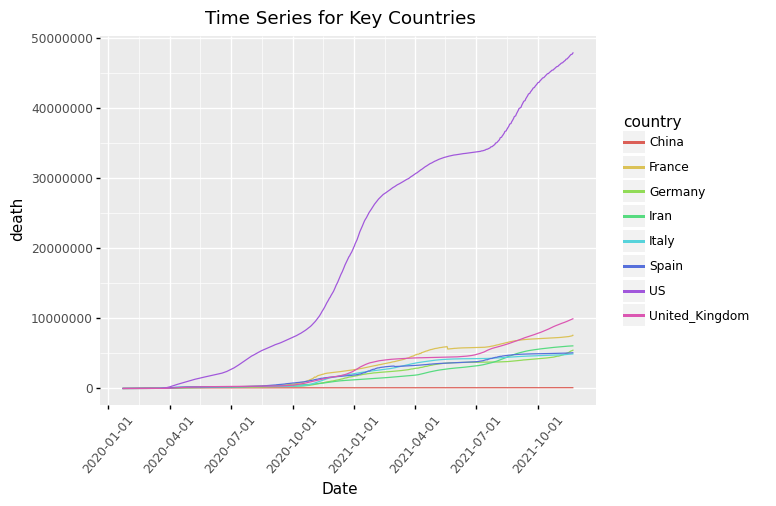

<ggplot: (8774927460268)>

In [72]:
(p9.ggplot(melt_key_country)
#+ p9.facet_wrap('~country',scales = 'free') 
+ p9.aes(x='Date',y='death',colour = 'country') 
+ p9.geom_line() 
+ p9.labs(title = 'Time Series for Key Countries')
+ p9.theme(axis_text_x = p9.element_text(angle=50))
)

#### Part III. Worldwide confirmed case aggregation and increasing rate

In [73]:
worldwide = df[8]
worldwide['Confirmed'] = pd.to_numeric(worldwide['Confirmed'],errors='coerce')
worldwide['Increase rate'] = pd.to_numeric(worldwide['Increase rate'],errors='coerce')
worldwide['Date'] = worldwide['Date'].astype(str)
worldwide['Date'] = pd.to_datetime(worldwide['Date'])

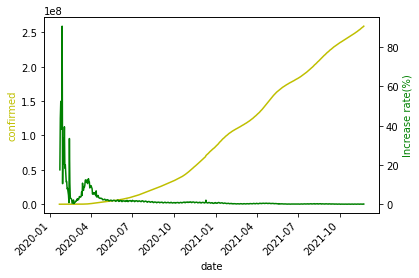

In [74]:
x = worldwide['Date']
y1 = worldwide['Confirmed']
y2 = worldwide['Increase rate']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'y-')
ax2.plot(x, y2, 'g-')

ax1.set_xlabel('date')
ax1.set_ylabel('confirmed', color='y')
ax2.set_ylabel('Increase rate(%)', color='g')
fig.autofmt_xdate(rotation=45)
plt.show()

## US 分界线

#### combine dataframe us_confirmed, us_deaths as us_simplified
#### want to see top 10 states that has the highest death cases and confirmed cases.
- G4 Data Munging

In [9]:
us_confirmed = df[5].drop('Country/Region', 1).rename(columns={"Case": "Confirmed"})
us_deaths = df[6].drop('Country/Region', 1).rename(columns={"Case": "Deaths"})


<ipython-input-9-22ff785bbc36>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
<ipython-input-9-22ff785bbc36>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [10]:
us_simplified = us_confirmed.merge(us_deaths,how='left', left_on=['Date','Province/State','Admin2'], 
                   right_on = ['Date','Province/State','Admin2'])
# 虽然知道df[7] 就是us_simplified. 但是老师不知道. 所以不能白写了我的merge table.

In [11]:
## XIAOXU
death_us = us_simplified.groupby(['Province/State']).agg({'Deaths':'sum'})
death_us = death_us.reset_index() #G4--index
us_top10 = death_us.sort_values([ 'Deaths'], ascending=False).groupby('Province/State').head(10)[0:10]
us_top10

,Province/State,Deaths
36,New York,25421538
5,California,22654265
49,Texas,20317650
11,Florida,15730632
34,New Jersey,12319558
43,Pennsylvania,10753007
17,Illinois,10395702
12,Georgia,8343555
26,Michigan,8338068
25,Massachusetts,7940142


In [13]:
confirmed_us = us_simplified.groupby(['Province/State']).agg({'Confirmed':'sum'})
confirmed_us = confirmed_us.reset_index() #G4--index
us_top10c = confirmed_us.sort_values([ 'Confirmed'], ascending=False).groupby('Province/State').head(10)[0:10]
us_top10c

,Province/State,Confirmed
5,California,1500082264
49,Texas,1198875544
11,Florida,981704861
36,New York,796941644
17,Illinois,538950437
12,Georgia,461031218
43,Pennsylvania,440491919
40,Ohio,422221141
37,North Carolina,395033506
34,New Jersey,382324067


Join the two table to get countries that are in both of the top 10 lists. 

In [14]:
us_top10.merge(us_top10c,on='Province/State') #join data

,Province/State,Deaths,Confirmed
0,New York,25421538,796941644
1,California,22654265,1500082264
2,Texas,20317650,1198875544
3,Florida,15730632,981704861
4,New Jersey,12319558,382324067
5,Pennsylvania,10753007,440491919
6,Illinois,10395702,538950437
7,Georgia,8343555,461031218


In [15]:
# IF we only look at the 25% highest 
us_simplified.describe()

,Confirmed,Deaths
count,2.252508e+06,2.252508e+06
mean,5.843762e+03,1.076306e+02
std,2.736832e+04,5.315954e+02
min,0.000000e+00,0.000000e+00
25%,4.900000e+01,0.000000e+00
50%,7.860000e+02,1.400000e+01
75%,3.259000e+03,6.000000e+01
max,1.522240e+06,2.707400e+04


In [43]:
high = us_simplified[(us_simplified['Confirmed'] >= 3.241000e+03) 
                     & (us_simplified['Deaths'] >= 6.000000e+01)]
high

,Admin2,Confirmed,Date,Province/State,Deaths
365,Autauga,5270,2021-01-21,Alabama,61
366,Autauga,5327,2021-01-22,Alabama,61
367,Autauga,5358,2021-01-23,Alabama,62
368,Autauga,5376,2021-01-24,Alabama,62
369,Autauga,5407,2021-01-25,Alabama,62
...,...,...,...,...,...
2249133,Sweetwater,8007,2021-11-21,Wyoming,97
2249134,Sweetwater,8049,2021-11-22,Wyoming,97
2249135,Sweetwater,8060,2021-11-23,Wyoming,97
2249136,Sweetwater,8064,2021-11-24,Wyoming,97


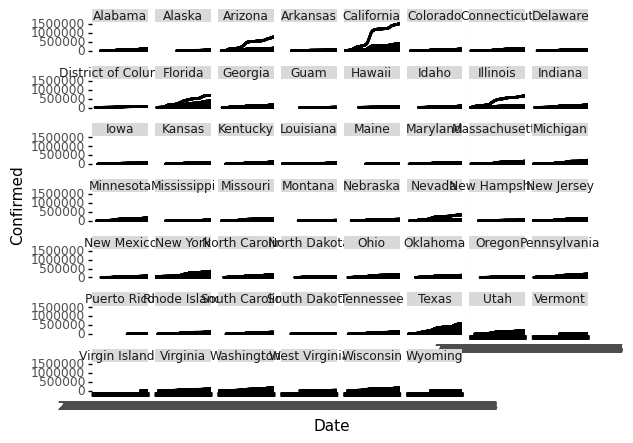

<ggplot: (8775831162618)>

In [44]:
gg = ggplot(high)
gg += p9.facet_wrap('Province/State')  
gg += p9.aes(x='Date', y='Confirmed')
gg += geom_point(size = 0.1)
gg

We can see that California has the greatest confirmed case. So we would like to get into more detail of California. 

## SQL
#### California vaccine data. 

In [63]:
# https://data.chhs.ca.gov/api/3/action/datastore_create
vac_url  = 'https://data.chhs.ca.gov/dataset/e283ee5a-cf18-4f20-a92c-ee94a2866ccd/resource/130d7ba2-b6eb-438d-a412-741bde207e1c/download/covid19vaccinesbycounty.csv'
vac_data = pd.read_csv(vac_url)
California_simplified = us_simplified[us_simplified['Province/State'] == 'California']

In [94]:
#combine confried/Deaths to the vaccine data
vaccine = California_simplified.merge(vac_data,how='inner', left_on=['Date','Admin2'], 
                   right_on = ['administered_date','county'])
us_confirmed = df[5].drop('Country/Region', 1)
vaccine = vaccine.drop(['administered_date','Admin2','Province/State','california_flag'],1)
vaccine 

<ipython-input-94-0842c9e9be87>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
<ipython-input-94-0842c9e9be87>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,Confirmed,Date,Deaths,county,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,booster_recip_count,cumulative_booster_recip_count
0,10689,2020-07-27,176,Alameda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10922,2020-07-28,180,Alameda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11225,2020-07-29,180,Alameda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11356,2020-07-30,185,Alameda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11537,2020-07-31,187,Alameda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28183,10655,2021-11-21,88,Yuba,149,72619,78,29928,47,38140,2,4222,54,3882,15,34019,54,37901,78,4524
28184,10691,2021-11-22,88,Yuba,245,72864,58,29986,158,38298,11,4233,45,3903,27,34046,48,37949,170,4694
28185,10697,2021-11-23,88,Yuba,236,73100,60,30046,142,38440,13,4246,60,3935,33,34079,65,38014,141,4835
28186,10700,2021-11-24,88,Yuba,217,73317,82,30128,108,38548,12,4258,41,3927,56,34135,48,38062,120,4955


In [109]:
# group data with county and timefrequency(month)
vaccine['Date'] = pd.to_datetime(vaccine['Date'].astype(str)).values
month = vaccine.groupby(['county',pd.Grouper(key = 'Date',freq='M')]).sum()
month

Confirmed  Deaths  total_doses  cumulative_total_doses  \
county  Date                                                                 
Alameda 2020-07-31      55729     908            0                       0   
        2020-08-31     470022    6770           30                     353   
        2020-09-30     585066    9385           48                    1703   
        2020-10-31     703279   12207            8                    2600   
        2020-11-30     800147   13066           12                    2728   
...                       ...     ...          ...                     ...   
Yuba    2021-07-31     201429    1592         3879                 1558053   
        2021-08-31     233483    1610         5795                 1709802   
        2021-09-30     273721    1798         5534                 1833047   
        2021-10-31     310058    2377         4382                 2041289   
        2021-11-30     264233    2131         5251                 1771492   

                    pfizer_doses  cumulative_pfizer_doses  moderna_doses  \
county  Date                                                               
Alameda 2020-07-31             0                        0              0   
        2020-08-31            28                      329              2   
        2020-09-30            46                     1606              2   
        2020-10-31             7                     2464              1   
        2020-11-30             6                     2506              2   
...                          ...                      ...            ...   
Yuba    2021-07-31          2237                   564418           1335   
        2021-08-31          3381                   651899           2096   
        2021-09-30          3262                   735372           1999   
        2021-10-31          2431                   849740           1788   
        2021-11-30          1640                   734280           3025   

                    cumulative_moderna_doses  jj_doses  cumulative_jj_doses  \
county  Date                                                                  
Alameda 2020-07-31                         0         0                    0   
        2020-08-31                        24         0                    0   
        2020-09-30                        97         0                    0   
        2020-10-31                       136         0                    0   
        2020-11-30                       172         4                   50   
...                                      ...       ...                  ...   
Yuba    2021-07-31                    896385       307                96816   
        2021-08-31                    950195       317               107253   
        2021-09-30                    984912       270               112274   
        2021-10-31                   1068222       162               122753   
        2021-11-30                    929207       222               103726   

                    partially_vaccinated  total_partially_vaccinated  \
county  Date                                                           
Alameda 2020-07-31                     0                           0   
        2020-08-31                    28                         349   
        2020-09-30                    13                         476   
        2020-10-31                     4                         165   
        2020-11-30                     7                         218   
...                                  ...                         ...   
Yuba    2021-07-31                  2020                      101424   
        2021-08-31                  3263                      140350   
        2021-09-30                  2055                      138082   
        2021-10-31                  1170                      118499   
        2021-11-30                  1145                       93526   

                    fully_vaccinated  cumulative_fu

In [110]:
vac_conn = sqla.create_engine('sqlite:///../data/vaccine.sqlite')
# vac_vaccine.to_sql('vaccine',vac_conn,if_exists='append')
month.to_sql('vaccine',vac_conn,if_exists='append')

In [115]:
# observe the fully_vaccinated rate have correlation to confirmed & deaths rage
fully_vac = pd.read_sql_query("select county,confirmed,deaths,fully_vaccinated,Date from vaccine group by county,Date", vac_conn)
fully_vac

,county,Confirmed,Deaths,fully_vaccinated,Date
0,Alameda,55729,908,0,2020-07-31 00:00:00.000000
1,Alameda,470022,6770,2,2020-08-31 00:00:00.000000
2,Alameda,585066,9385,35,2020-09-30 00:00:00.000000
3,Alameda,703279,12207,4,2020-10-31 00:00:00.000000
4,Alameda,800147,13066,4,2020-11-30 00:00:00.000000
...,...,...,...,...,...
981,Yuba,201429,1592,1834,2021-07-31 00:00:00.000000
982,Yuba,233483,1610,2383,2021-08-31 00:00:00.000000
983,Yuba,273721,1798,3107,2021-09-30 00:00:00.000000
984,Yuba,310058,2377,1791,2021-10-31 00:00:00.000000


IndexError: index 58 is out of bounds for axis 0 with size 58

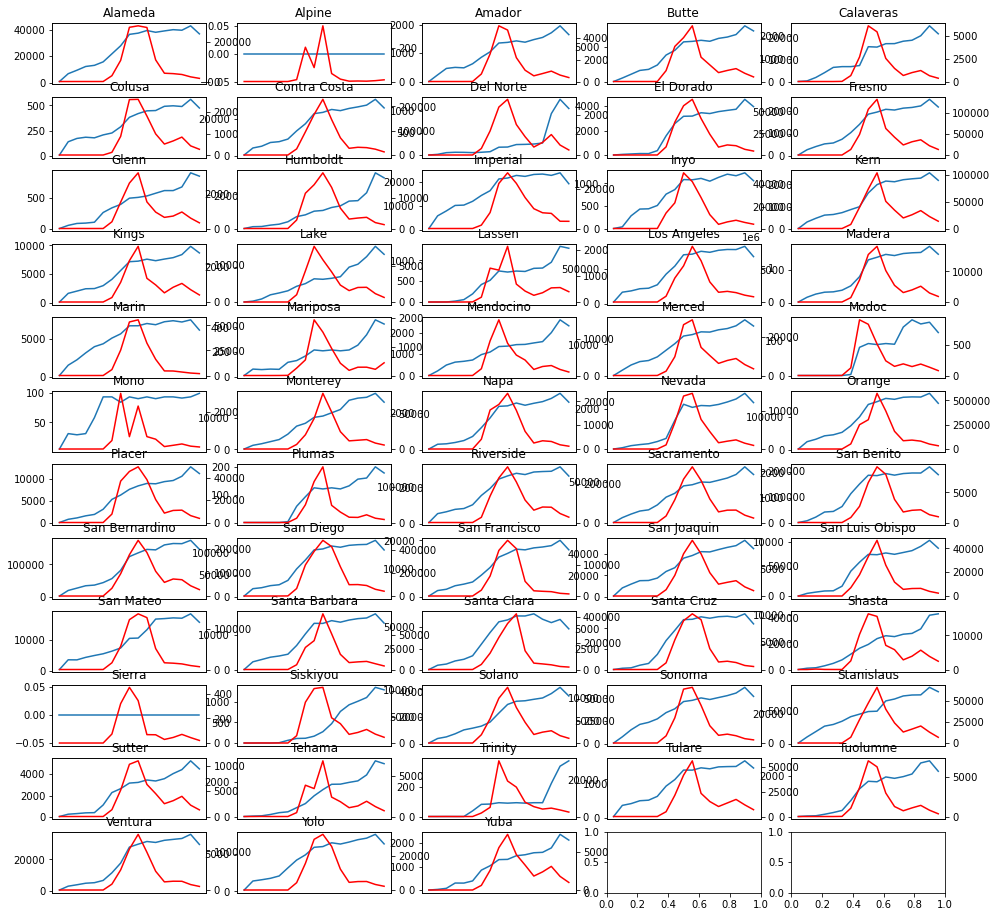

In [182]:
# gg = ggplot(fully_vac)
# gg += p9.facet_wrap('county')  
# gg += geom_point(p9.aes(x='Date', y='fully_vaccinated'),size = 0.1)
# gg += geom_point(p9.aes(x='Date', y='Confirmed'),size = 0.1)
# gg


fig, ax= plt.subplots(12,5, figsize=(16,16))


# for i in range(1, 7):
#     plt.subplot(2, 3, i)
#     plt.title('Histogram of {}'.format(str(i)))
#     plt.hist(x[:,i-1], bins=60)
# ax[0].plot(fully_vac[fully_vac['county']=='Alameda']['Date'],
#              fully_vac[fully_vac['county']=='Alameda']['Confirmed'])
for i in range(12):
    for j in range(5):
        ax[i,j].plot(fully_vac[fully_vac['county']==county[i*5+j]]['Date'],
                     fully_vac[fully_vac['county']==county[i*5+j]]['Deaths'])
#         ax[i,j].secondary_yaxis(fully_vac[fully_vac['county']==county[i*5+j]]['fully_vaccinated'])

        ax[i,j].axes.xaxis.set_visible(False)
        ax[i,j].set_title(county[i*5+j])
        
        axx = ax[i,j].twinx()
        axx.plot(fully_vac[fully_vac['county']==county[i*5+j]]['Date'],
                        fully_vac[fully_vac['county']==county[i*5+j]]['fully_vaccinated'],
                color='red')
#         lns2 = axx.axes.xaxis.set_visible(False)
#         fig.tight_layout()
#         plt.show()
   

furthermore可探讨问题:
1. booster shoot对covid有没有影响
2. 